<a href="https://colab.research.google.com/github/vanhau8562/AI-/blob/main/AI-27_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=92d024d19018b5aa122656f3c3cd9ef272c304cc824b734ec88fd6216081eea0
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


4.800000000000076


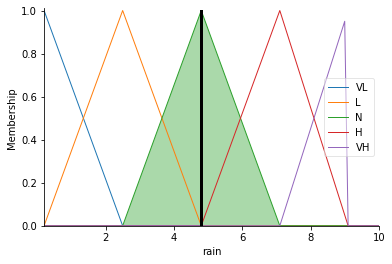

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
temp = ctrl.Antecedent(np.arange(20.4,42.2,0.1),'temp')
wind = ctrl.Antecedent(np.arange(0.7,4.1,0.1), 'wind')
rain = ctrl.Consequent(np.arange(0.2,10.1,0.1), 'rain')
temp ['VL'] = fuzz.trimf(temp.universe,[20.4,20.4,25])
temp ['L']=  fuzz.trimf(temp.universe,[20.4,25,30])
temp ['N']= fuzz.trimf(temp.universe,[25,30,35])
temp ['H']= fuzz.trimf(temp.universe,[30,35,41.2])
temp ['VH']= fuzz.trimf(temp.universe,[35,41.2,41.2])

wind ['VL'] = fuzz.trimf(wind.universe,[0.7,0.7,1.5])
wind ['L'] = fuzz.trimf(wind.universe,[0.7,1.5,2])
wind ['N'] = fuzz.trimf(wind.universe,[1.5,2,2.5])
wind ['H'] = fuzz.trimf(wind.universe,[2,2.5,3.1])
wind ['VH'] = fuzz.trimf(wind.universe,[2.5,3.1,3.1])

rain['VL'] = fuzz.trimf(rain.universe,[0.2,0.2,2.5])
rain['L'] = fuzz.trimf(rain.universe,[0.2,2.5,4.8])
rain['N'] = fuzz.trimf(rain.universe,[2.5,4.8,7.1])
rain['H'] = fuzz.trimf(rain.universe,[4.8,7.1,9.1])
rain['VH'] = fuzz.trimf(rain.universe,[7.1,9.1,9.1])

rule1 = ctrl.Rule(temp['VL']&wind['VL'],rain['VL'])
rule2 = ctrl.Rule(temp['VL']&wind['L'],rain['L'])
rule3 = ctrl.Rule(temp['VL']&wind['N'],rain['L'])
rule4 = ctrl.Rule(temp['VL']&wind['H'],rain['N'])
rule5 = ctrl.Rule(temp['VL']&wind['VH'],rain['N'])
rule6 = ctrl.Rule(temp['L']&wind['VL'],rain['L'])
rule7 = ctrl.Rule(temp['L']&wind['L'],rain['L'])
rule8 = ctrl.Rule(temp['L']&wind['N'],rain['N'])
rule9 = ctrl.Rule(temp['L']&wind['H'],rain['N'])
rule10 = ctrl.Rule(temp['L']&wind['VH'],rain['H'])
rule11 = ctrl.Rule(temp['N']&wind['VL'],rain['L'])
rule12 = ctrl.Rule(temp['N']&wind['L'],rain['N'])
rule13 = ctrl.Rule(temp['N']&wind['N'],rain['N'])
rule14 = ctrl.Rule(temp['N']&wind['H'],rain['H'])
rule15 = ctrl.Rule(temp['N']&wind['VH'],rain['H'])
rule16 = ctrl.Rule(temp['H']&wind['VL'],rain['N'])
rule17 = ctrl.Rule(temp['H']&wind['L'],rain['N'])
rule18 = ctrl.Rule(temp['H']&wind['N'],rain['H'])
rule19 = ctrl.Rule(temp['H']&wind['H'],rain['H'])
rule20 = ctrl.Rule(temp['H']&wind['VH'],rain['VH'])
rule21 = ctrl.Rule(temp['VH']&wind['VL'],rain['N'])
rule22 = ctrl.Rule(temp['VH']&wind['L'],rain['H'])
rule23 = ctrl.Rule(temp['VH']&wind['N'],rain['H'])
rule24 = ctrl.Rule(temp['VH']&wind['H'],rain['VH'])
rule25 = ctrl.Rule(temp['VH']&wind['VH'],rain['VH'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['temp']= 30
tipping.input['wind']= 2
tipping.compute()
print(tipping.output['rain'])
rain.view(sim=tipping)

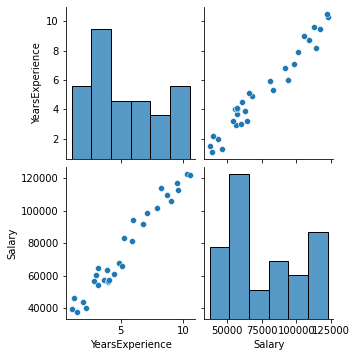

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('Salary_Data.csv')
data.head()
#data.shape()

x = data.drop(['Salary'],axis=True) #xoa cot salary
y = data['Salary']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape
sns.pairplot(data)

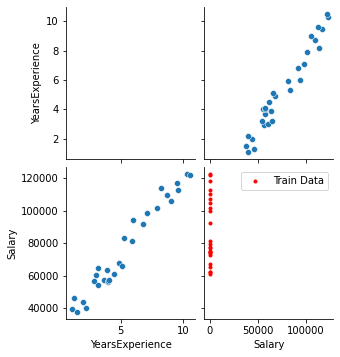

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('Salary_Data.csv')
data.head()
#data.shape()

x = data.drop(['Salary'],axis=True) #xoa cot salary
y = data['Salary']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape
sns.pairplot(data)
plt.plot(x_train,y_train,'r.',label='Train Data')
plt.xlabel('Year Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [ ]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test).round(1)
cal=pd.DataFrame(np.c_[y_test,y_pred],columns=['Original Salary','Predict Salary'])
print('Coeffient',model.coef_)
print('Intercept',model.intercept_)
print('Accuracy',model.score(x_test,y_test))

Coeffient [9423.81532303]
Intercept 25321.583011776813
Accuracy 0.9024461774180497


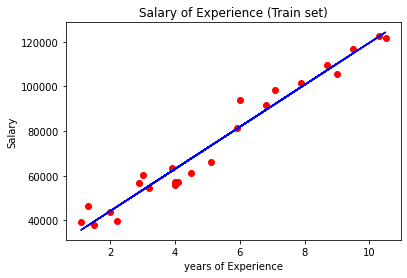

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('Salary_Data.csv')
data.head()
#data.shape()

x = data.drop(['Salary'],axis=True) #xoa cot salary
y = data['Salary']

plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,model.predict(x_train),color='blue')
plt.title('Salary of Experience (Train set)')
plt.xlabel('years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 8.7 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=00b1073cea727be8ac1e22b4f240e52c2ca7db2d929067a5f57f7e1082c265a4
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(10,121,1),'time')
rice = ctrl.Antecedent(np.arange(100,1001,1), 'rice')
power = ctrl.Consequent(np.arange(0,101,1), 'power')
time ['ratcham'] = fuzz.trimf(time.universe,[10,10,30])
time ['cham']=  fuzz.trimf(time.universe,[10,30,60])
time ['binhthuong']= fuzz.trimf(time.universe,[30,60,90])
time ['nhanh']= fuzz.trimf(time.universe,[60,90,120])
time ['ratnhanh']= fuzz.trimf(time.universe,[90,120,120])

rice['ratit'] = fuzz.trimf(rice.universe,[100,100,250])
rice['it'] = fuzz.trimf(rice.universe,[100,250,500])
rice['binhthuong'] = fuzz.trimf(rice.universe,[250,500,750])
rice['nhieu'] = fuzz.trimf(rice.universe,[500,750,1000])
rice['ratnhieu'] = fuzz.trimf(rice.universe,[750,1000,1000])

power['ratyeu'] = fuzz.trimf(power.universe,[0,0,25])
power['yeu'] = fuzz.trimf(power.universe,[0,25,50])
power['binhthuong'] = fuzz.trimf(power.universe,[25,50,75])
power['manh'] = fuzz.trimf(power.universe,[50,75,100])
power['ratmanh'] = fuzz.trimf(power.universe,[75,100,100])
#time.view()
#rice.view()
#power.view()
rule1 = ctrl.Rule(time['ratcham']&rice['ratit'],power['binhthuong'])
rule2 = ctrl.Rule(time['ratcham']&rice['it'],power['binhthuong'])
rule3 = ctrl.Rule(time['ratcham']&rice['binhthuong'],power['yeu'])
rule4 = ctrl.Rule(time['ratcham']&rice['nhieu'],power['yeu'])
rule5 = ctrl.Rule(time['ratcham']&rice['ratnhieu'],power['ratyeu'])
rule6 = ctrl.Rule(time['cham']&rice['ratnhieu'],power['yeu'])
rule7 = ctrl.Rule(time['cham']&rice['nhieu'],power['yeu'])
rule8 = ctrl.Rule(time['cham']&rice['binhthuong'],power['binhthuong'])
rule9 = ctrl.Rule(time['cham']&rice['it'],power['binhthuong'])
rule10 = ctrl.Rule(time['cham']&rice['ratit'],power['manh'])
rule11 = ctrl.Rule(time['binhthuong']&rice['ratnhieu'],power['yeu'])
rule12 = ctrl.Rule(time['binhthuong']&rice['nhieu'],power['binhthuong'])
rule13 = ctrl.Rule(time['binhthuong']&rice['binhthuong'],power['binhthuong'])
rule14 = ctrl.Rule(time['binhthuong']&rice['it'],power['manh'])
rule15 = ctrl.Rule(time['binhthuong']&rice['ratit'],power['manh'])
rule16 = ctrl.Rule(time['nhanh']&rice['ratnhieu'],power['binhthuong'])
rule17 = ctrl.Rule(time['nhanh']&rice['nhieu'],power['binhthuong'])
rule18 = ctrl.Rule(time['nhanh']&rice['binhthuong'],power['manh'])
rule19 = ctrl.Rule(time['nhanh']&rice['it'],power['manh'])
rule20 = ctrl.Rule(time['nhanh']&rice['ratit'],power['ratmanh'])
rule21 = ctrl.Rule(time['ratnhanh']&rice['ratnhieu'],power['binhthuong'])
rule22 = ctrl.Rule(time['ratnhanh']&rice['nhieu'],power['manh'])
rule23 = ctrl.Rule(time['ratnhanh']&rice['binhthuong'],power['manh'])
rule24 = ctrl.Rule(time['ratnhanh']&rice['it'],power['ratmanh'])
rule25 = ctrl.Rule(time['ratnhanh']&rice['ratit'],power['ratmanh'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])